In [117]:
from collections import defaultdict
import numpy as np
import pyalex
from pyalex import Sources, Works
from tqdm.notebook import tqdm, trange

from research_impact.pyalex_utils import merge_sample, merge_pages
from research_impact.utils import dict_to_dataarray

In [4]:
# The polite pool has much faster and more consistent response times. To get into the polite pool, you set your email:
pyalex.config.email = "ben@epochai.org"

In [61]:
Sources().get()

[{'id': 'https://openalex.org/S4306525036',
  'issn_l': None,
  'issn': None,
  'display_name': 'PubMed',
  'host_organization': 'https://openalex.org/I1299303238',
  'host_organization_name': 'National Institutes of Health',
  'host_organization_lineage': ['https://openalex.org/I1299303238'],
  'works_count': 33077501,
  'cited_by_count': 911137143,
  'summary_stats': {'2yr_mean_citedness': 0.0, 'h_index': 2, 'i10_index': 1},
  'is_oa': False,
  'is_in_doaj': False,
  'ids': {'openalex': 'https://openalex.org/S4306525036',
   'wikidata': 'https://www.wikidata.org/entity/Q180686'},
  'homepage_url': 'https://pubmed.ncbi.nlm.nih.gov',
  'apc_prices': None,
  'apc_usd': None,
  'country_code': 'US',
  'societies': [],
  'alternate_titles': [],
  'abbreviated_title': None,
  'type': 'repository',
  'x_concepts': [],
  'counts_by_year': [{'year': 2023,
    'works_count': 0,
    'cited_by_count': 31158336},
   {'year': 2022, 'works_count': 0, 'cited_by_count': 63537232},
   {'year': 2021, '

In [34]:
Works().filter(concepts={'id': 'https://openalex.org/C119857082'}).get()

[{'id': 'https://openalex.org/W2194775991',
  'doi': 'https://doi.org/10.1109/cvpr.2016.90',
  'title': 'Deep Residual Learning for Image Recognition',
  'display_name': 'Deep Residual Learning for Image Recognition',
  'publication_year': 2016,
  'publication_date': '2016-06-01',
  'ids': {'openalex': 'https://openalex.org/W2194775991',
   'doi': 'https://doi.org/10.1109/cvpr.2016.90',
   'mag': '2194775991'},
  'language': 'en',
  'primary_location': {'is_oa': False,
   'landing_page_url': 'https://doi.org/10.1109/cvpr.2016.90',
   'pdf_url': None,
   'source': None,
   'license': None,
   'version': None},
  'type': 'proceedings-article',
  'open_access': {'is_oa': True,
   'oa_status': 'green',
   'oa_url': 'https://repositorio.unal.edu.co/bitstream/unal/81443/1/98670607.2022.pdf',
   'any_repository_has_fulltext': True},
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A4344207660',
     'display_name': 'Kaiming He',
     'orcid': None},
  

In [12]:
mag_count = 0
for i in range(100):
    work = Works().random()
    if 'mag' in work['ids'].keys():
        mag_count += 1
mag_count

81

In [41]:
works_sample = merge_sample(
    Works().filter(publication_year="2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022"),
    sample_size=9000,
    seed=42,
)

100%|██████████| 46/46 [02:03<00:00,  2.68s/it]


In [43]:
len(works_sample)

9000

In [69]:
total_count_years = defaultdict(int)
mag_count_years = defaultdict(int)
pubmed_count_years = defaultdict(int)

for work in works_sample:
    pub_year = work['publication_year']
    total_count_years[pub_year] += 1
    if 'mag' in work['ids'].keys():
        mag_count_years[pub_year] += 1
    if 'pmid' in work['ids'].keys():
        pubmed_count_years[pub_year] += 1
    # if not ('mag' in work['ids'].keys() or 'pmid' in work['ids'].keys()):
    #     print(work['ids'].keys())

In [70]:
total_count_years = dict_to_dataarray(total_count_years, 'year')
total_count_years

<xarray.DataArray (year: 13)>
array([567., 634., 638., 660., 695., 777., 695., 771., 699., 772., 768.,
       709., 615.])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [71]:
mag_count_years = dict_to_dataarray(mag_count_years, 'year')
mag_count_years

<xarray.DataArray (year: 13)>
array([489., 556., 569., 575., 600., 680., 612., 649., 596., 638., 620.,
       487.,  28.])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [72]:
pubmed_count_years = dict_to_dataarray(pubmed_count_years, 'year')
pubmed_count_years

<xarray.DataArray (year: 13)>
array([ 63.,  69.,  87.,  86.,  90., 104.,  89.,  92.,  83., 119., 111.,
       134., 126.])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [73]:
print("% of works with MAG IDs")
for count in mag_count_years:
    print(f"{count.year.item()}: {float(count) / float(total_count_years.sel(year=count.year)) * 100:.0f}%")

% of works with MAG IDs
2010: 86%
2011: 88%
2012: 89%
2013: 87%
2014: 86%
2015: 88%
2016: 88%
2017: 84%
2018: 85%
2019: 83%
2020: 81%
2021: 69%
2022: 5%


In [58]:
print("% of works with PubMed IDs")
for count in pubmed_count_years:
    print(f"{count.year.item()}: {float(count) / float(total_count_years.sel(year=count.year)) * 100:.0f}%")

% of works with PubMed IDs
2010: 11%
2011: 11%
2012: 14%
2013: 13%
2014: 13%
2015: 13%
2016: 13%
2017: 12%
2018: 12%
2019: 15%
2020: 14%
2021: 19%
2022: 20%


In [77]:
np.mean(mag_count_years.loc[:2020] / total_count_years.loc[:2020]) / (mag_count_years.loc[2021] / total_count_years.loc[2021])

<xarray.DataArray ()>
array(1.25066171)
Coordinates:
    year     int64 2021

In [78]:
np.mean(mag_count_years.loc[:2020] / total_count_years.loc[:2020]) / (mag_count_years.loc[2022] / total_count_years.loc[2022])

<xarray.DataArray ()>
array(18.86859937)
Coordinates:
    year     int64 2022

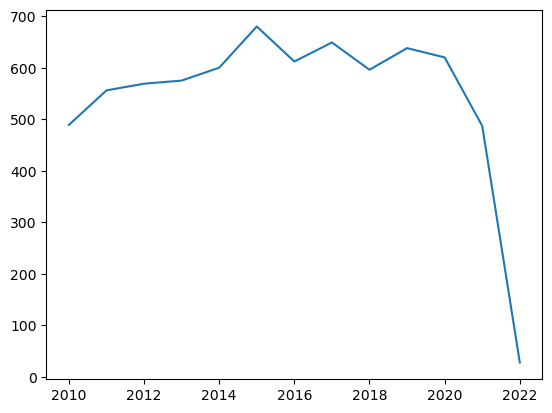

In [79]:
import matplotlib.pyplot as plt

plt.plot(mag_count_years.year, mag_count_years)

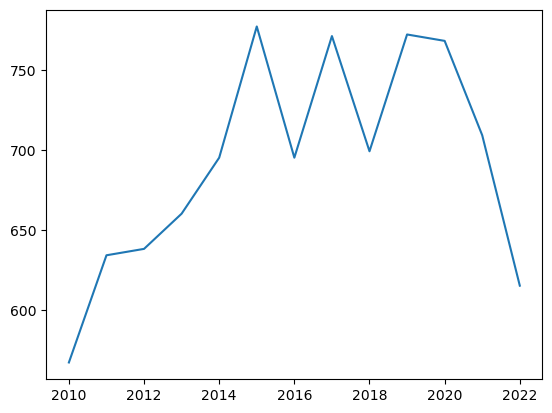

In [80]:
plt.plot(total_count_years.year, total_count_years)

In [64]:
mag_only_count = 0
redundant_count = 0
for work in tqdm(works_sample):
    locations = work['locations']
    for location in locations:
        mag_counted = False
        redundant_counted = False
        if location['source'] is not None:
            source_id = location['source'].get('id') 
            if source_id is not None:
                source = Sources()[source_id]
                source_keys = source['ids'].keys()
                if ('mag' in source_keys) and ('issn' not in source_keys) and ('fatcat' not in source_keys) and ('wikidata' not in source_keys):
                    if not mag_counted and not redundant_counted:
                        mag_only_count += 1
                        mag_counted = True
                elif ('issn' in source_keys) or ('fatcat' in source_keys) or ('wikidata' in source_keys):
                    if not redundant_counted:
                        if mag_counted:
                            mag_only_count -= 1
                        redundant_count += 1
                        redundant_counted = True
mag_only_count, redundant_count

  0%|          | 0/9000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [81]:
concept_ids = [
    'https://openalex.org/C154945302',  # Artificial intelligence
    'https://openalex.org/C119857082',  # Machine learning
]
concept_query = "|".join(concept_ids)
concept_query

'https://openalex.org/C154945302|https://openalex.org/C119857082'

In [119]:
ai_works_sample = []
for i in trange(100):
    ai_works_sample.extend(merge_sample(
        Works() \
            .filter(publication_year="2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022") \
            .filter(concepts={'id': concept_query}),
        sample_size=1000,
        seed=42 + i,
    ))

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:08<00:00,  1.37s/it]


In [92]:
# ai_works_sample = merge_pages(
#     Works() \
#         .filter(publication_year="2010|2011|2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022") \
#         .filter(concepts={'id': concept_query}) \
#     .paginate(per_page=200, n_max=9000)
# )

45page [01:21,  1.82s/page]


In [120]:
ai_total_count_years = defaultdict(int)
ai_mag_count_years = defaultdict(int)
ai_pubmed_count_years = defaultdict(int)

for work in ai_works_sample:
    pub_year = work['publication_year']
    ai_total_count_years[pub_year] += 1
    if 'mag' in work['ids'].keys():
        ai_mag_count_years[pub_year] += 1
    if 'pmid' in work['ids'].keys():
        ai_pubmed_count_years[pub_year] += 1

In [121]:
ai_total_count_years = dict_to_dataarray(ai_total_count_years, 'year')

In [122]:
ai_mag_count_years = dict_to_dataarray(ai_mag_count_years, 'year')

In [123]:
ai_pubmed_count_years = dict_to_dataarray(ai_pubmed_count_years, 'year')

In [124]:
ai_mag_count_years / ai_total_count_years

<xarray.DataArray (year: 13)>
array([0.96204255, 0.94972783, 0.9526976 , 0.94728983, 0.94830841,
       0.93363087, 0.94354839, 0.93409344, 0.93195565, 0.92236132,
       0.90427763, 0.7766372 , 0.06064281])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [125]:
ai_pubmed_count_years / ai_total_count_years

<xarray.DataArray (year: 13)>
array([0.06297872, 0.06644252, 0.0717848 , 0.07436165, 0.07405256,
       0.07414339, 0.07949309, 0.09065628, 0.07900706, 0.08349604,
       0.09016565, 0.10246174, 0.12179098])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

In [126]:
ai_total_count_years

<xarray.DataArray (year: 13)>
array([ 5875.,  6246.,  6617.,  6697.,  6887.,  6946.,  6944.,  7192.,
        7936.,  8707.,  9538., 10521.,  9894.])
Coordinates:
  * year     (year) int64 2010 2011 2012 2013 2014 ... 2018 2019 2020 2021 2022

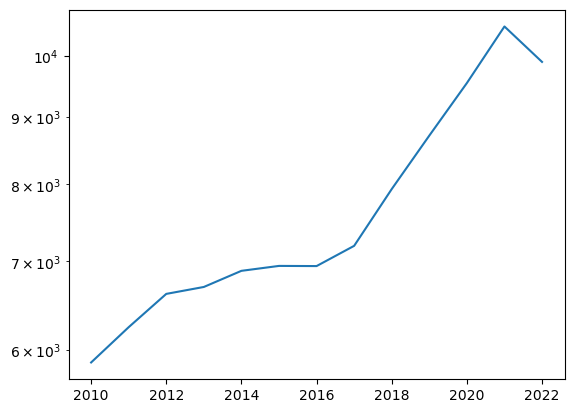

In [130]:
plt.semilogy(ai_total_count_years.year, ai_total_count_years)

In [140]:
ooms_per_year_2017_2020 = np.log10(ai_total_count_years.loc[2020] / ai_total_count_years.loc[2017]) / (2020 - 2017)

In [141]:
adjusted_ai_total_count_2021 = 10**(np.log10(ai_total_count_years.loc[2020]) + ooms_per_year_2017_2020)
adjusted_ai_total_count_2021 / ai_total_count_years.loc[2021] 

<xarray.DataArray ()>
array(0.99602333)

In [142]:
adjusted_ai_total_count_2022 = 10**(np.log10(adjusted_ai_total_count_2021) + ooms_per_year_2017_2020)
adjusted_ai_total_count_2022 / ai_total_count_years.loc[2022]

<xarray.DataArray ()>
array(1.16365392)

In [147]:
list(ai_total_count_years.loc[:2020])

[<xarray.DataArray ()>
 array(5875.)
 Coordinates:
     year     int64 2010,
 <xarray.DataArray ()>
 array(6246.)
 Coordinates:
     year     int64 2011,
 <xarray.DataArray ()>
 array(6617.)
 Coordinates:
     year     int64 2012,
 <xarray.DataArray ()>
 array(6697.)
 Coordinates:
     year     int64 2013,
 <xarray.DataArray ()>
 array(6887.)
 Coordinates:
     year     int64 2014,
 <xarray.DataArray ()>
 array(6946.)
 Coordinates:
     year     int64 2015,
 <xarray.DataArray ()>
 array(6944.)
 Coordinates:
     year     int64 2016,
 <xarray.DataArray ()>
 array(7192.)
 Coordinates:
     year     int64 2017,
 <xarray.DataArray ()>
 array(7936.)
 Coordinates:
     year     int64 2018,
 <xarray.DataArray ()>
 array(8707.)
 Coordinates:
     year     int64 2019,
 <xarray.DataArray ()>
 array(9538.)
 Coordinates:
     year     int64 2020]

In [149]:
adjusted_ai_total_count_2021

<xarray.DataArray ()>
array(10479.16144371)
Coordinates:
    year     int64 2020

In [150]:
adjusted_ai_total_count_2022

<xarray.DataArray ()>
array(11513.19192318)
Coordinates:
    year     int64 2020

In [152]:
9894 * 1.16

11477.039999999999

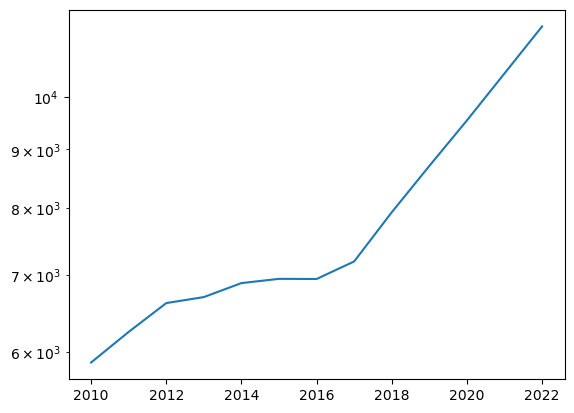

In [148]:
plt.semilogy(ai_total_count_years.year, list(ai_total_count_years.loc[:2020]) + [adjusted_ai_total_count_2021, adjusted_ai_total_count_2022])

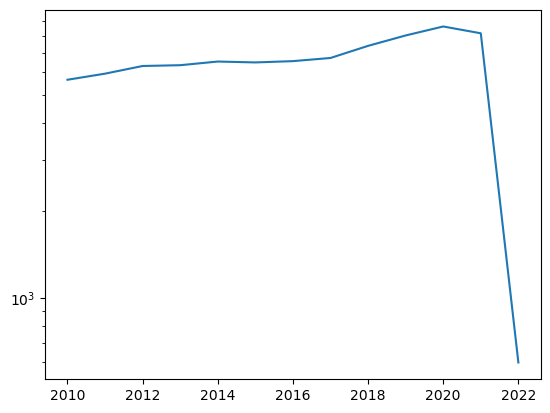

In [131]:
plt.semilogy(ai_mag_count_years.year, ai_mag_count_years)